# Academic Performance Dataset

In [5]:
import numpy as np
import pandas as pd 

%matplotlib inline

df = pd.read_csv('xAPI-Edu-Data.csv')
print(df.shape)
df.head()


(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

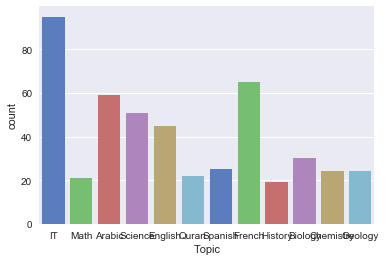

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Topic", data=df, palette="muted")#Classifying by subject
plt.figure(figsize = (15,20))

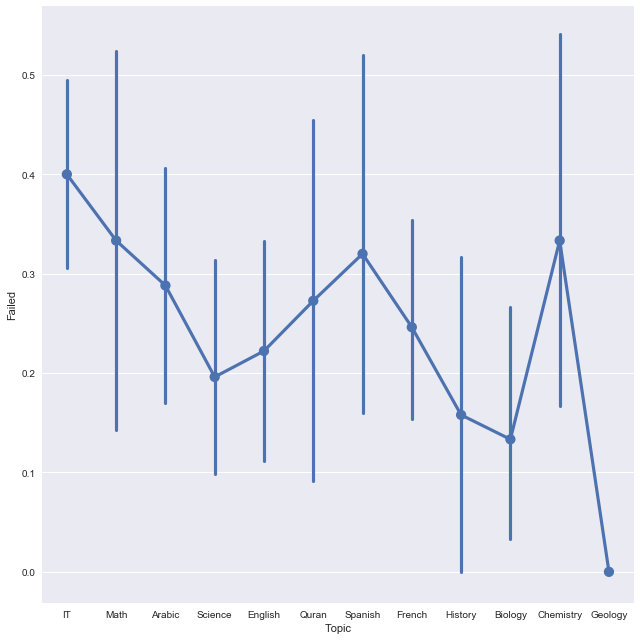

In [12]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

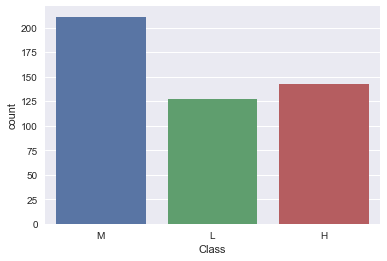

In [13]:
#IT has the most no of fails?
sns.countplot(x='Class',data=df)

In [14]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

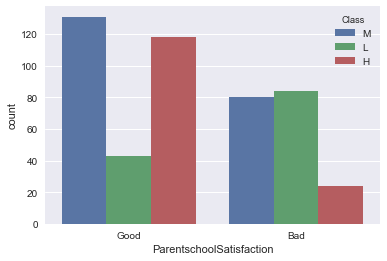

In [16]:
sns.countplot(x='ParentschoolSatisfaction',data = df, hue='Class')
plt.figure(figsize = (20,20))

Clearly Well-performing students' parents were satisfied with the school

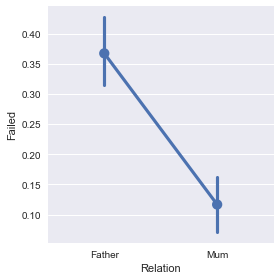

In [17]:
sns.factorplot('Relation','Failed',data=df)

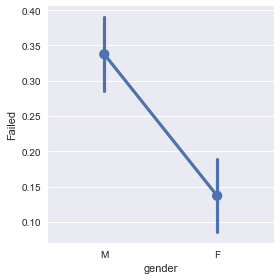

In [18]:
sns.factorplot("gender","Failed",data=df)

Chances of failing are much lower if you're a girl

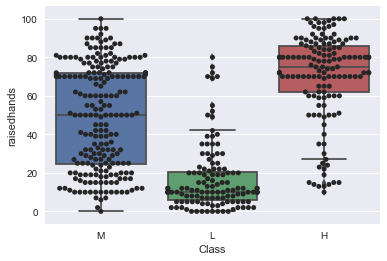

In [20]:
Raised_hand = sns.boxplot(x="Class", y="raisedhands", data=df)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df, color=".15")

/Users/radhikanikam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


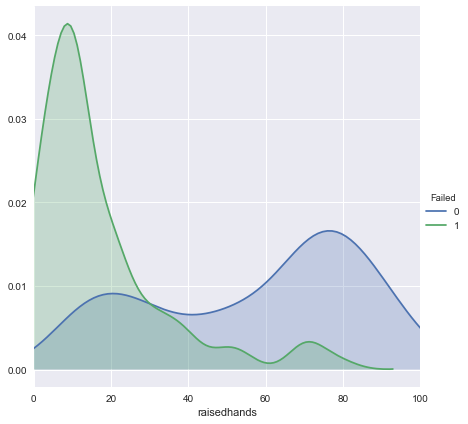

In [21]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()

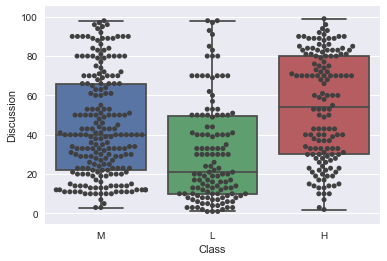

In [22]:
ax = sns.boxplot(x="Class", y="Discussion", data=df)
ax = sns.swarmplot(x="Class", y="Discussion", data=df, color=".25")

In [23]:
df.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed
Topic,,,,,
Arabic,32.0,65.0,41.0,38.0,0.0
Biology,78.5,88.5,54.0,47.0,0.0
Chemistry,79.0,84.5,47.0,30.5,0.0
English,55.0,50.0,33.0,36.0,0.0
French,35.0,80.0,23.0,21.0,0.0
Geology,80.0,82.0,68.5,60.5,0.0
History,69.0,84.0,72.0,65.0,0.0
IT,20.0,25.0,10.0,40.0,0.0
Math,28.0,15.0,19.0,40.0,0.0


In [24]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

In [25]:
df['TotalQ'] = df['Class']
df['TotalQ'].loc[df.TotalQ == 'Low-Level'] = 0.0
df['TotalQ'].loc[df.TotalQ == 'Middle-Level'] = 1.0
df['TotalQ'].loc[df.TotalQ == 'High-Level'] = 2.0

continuous_subset = df.ix[:,9:13]

X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X.shape

/Users/radhikanikam/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(480, 4)

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 75


/Users/radhikanikam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.48


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.48      0.74      0.59        39
          L       0.50      0.03      0.06        34
          M       0.48      0.55      0.51        71

avg / total       0.48      0.48      0.42       144



In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 59


In [30]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.59
